In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset exploration, description, and cleaning

In [2]:
df = pd.read_csv("PlayerValueData.csv")

In [3]:
# Shape description
# Column description

df.shape # Shows a shape of (2075, 548)

# We are interested in most of its columns, but we have several null values in the columns,
# so there are several rows we are going to drop

(2075, 548)

In [4]:
# Analysis of missing values for df

cols_with_null = df.isnull().sum().to_frame()
cols_with_null.head(60)

,0
Player,0
Club,0
Age,0
Position,0
Nation,0
Value,0
Contract Years Left,0
League,0
Squad (20/21),165
MP (20/21),165


In [5]:
# Dropping columns with more than 165 missing values

cols_to_drop = df.columns[df.isnull().sum()>165]

df_with_drops = df.drop(cols_to_drop, axis=1)

In [6]:
# We still have several columns with 165 null values

cols_with_null = df_with_drops.isnull().sum().to_frame()
cols_with_null.head(60)


# We are going to drop the rows that have null values for such columns

df_with_drops.dropna(subset=['Squad (20/21)'], inplace=True)

In [7]:
df_with_drops

cols_with_null = df_with_drops.isnull().sum().to_frame()


# Checking if there are still any null values in our dataframe

df_with_drops.isnull().values.any() # All null values have been cleaned

False

In [8]:
df_with_drops.shape # Current shape after drops is (1910, 129)

(1910, 129)

In [9]:
df_with_drops["Player"] = df_with_drops["Player"].apply(lambda x: str(x))
df_with_drops["Nation"] = df_with_drops["Nation"].apply(lambda x: str(x))
df_with_drops["Club"] = df_with_drops["Club"].apply(lambda x: str(x))

In [10]:
# Column description

# We extract the names for the columns

# For the presentation, we should categorize them, as we have 129 columns

col_list = df_with_drops.columns.values.tolist()

col_list

['Player',
 'Club',
 'Age',
 'Position',
 'Nation',
 'Value',
 'Contract Years Left',
 'League',
 'Squad (20/21)',
 'MP (20/21)',
 'Starts (20/21)',
 'Min (20/21)',
 'Total Mins/90 (20/21)',
 'Gls (20/21)',
 'Ast (20/21)',
 'Non-Penalty Goals (20/21)',
 'Penalties Scored (20/21)',
 'Penalties Attempted (20/21)',
 'Yellow Cards (20/21)',
 'Red Cards (20/21)',
 'Gls/90 (20/21)',
 'Ast/90 (20/21)',
 '(G+A)/90 (20/21)',
 'Non-Penalty Goals/90 (20/21)',
 '(Gls+Ast-Scored Penalties)/90 (20/21)',
 'xG (20/21)',
 'Non-Penalty xG (20/21)',
 'xA (20/21)',
 'Non-penalty xG+ xA (20/21)',
 'xG/90 (20/21)',
 'xA/90 (20/21)',
 '(xG+xA)/90 (20/21)',
 'Non-Penalty xG/90 (20/21)',
 '(Non-Penalty xG+xA)/90 (20/21)',
 'Total Shots (20/21)',
 'Total Shots on Target (20/21)',
 'Shots/90 (20/21)',
 'Shots on Target/90 (20/21)',
 'Freekick Shots (20/21)',
 'Goals Scored minus xG (20/21)',
 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)',
 'Shot-Creating Actions (20/21)',
 'Shot-Creating Actions/90 (20

In [11]:
# We won't probably need the 129 columns, and it might be acceptable to drop several of them
# for the construction of the model

len(col_list)

129

In [12]:
df_clean = df_with_drops[['Player', 'Club', 'Age', 'Position', 'Nation', 'Contract Years Left', 'MP (20/21)', 'Starts (20/21)', 'Gls (20/21)', 'Ast (20/21)', '(G+A)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Touches (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Defensive Blocks (20/21)', 'Total Shots Blocked (20/21)', 'Goal Saving Blocks (20/21)', 'Total Clearances (20/21)', 'Fouls Committed (20/21)', 'Crosses (20/21)', 'Aerial Duel Won (20/21)', 'Value']]

In [13]:
df_clean

,Player,Club,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),...,Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,1.00,31.0,27.0,27.0,7.0,...,812.0,61.0,12.0,1.0,0.0,7.0,23.0,68.0,7.0,144000000
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,3.00,28.0,27.0,27.0,6.0,...,360.0,32.0,20.0,9.0,0.0,15.0,21.0,13.0,37.0,117000000
2,Harry Kane,Tottenham Hotspur,28,attack,England,3.00,35.0,35.0,23.0,14.0,...,657.0,125.0,30.0,13.0,1.0,41.0,26.0,37.0,90.0,108000000
3,Jadon Sancho,Manchester United,21,attack,England,5.00,26.0,24.0,8.0,11.0,...,1160.0,148.0,38.0,1.0,0.0,8.0,1.0,52.0,5.0,90000000
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,2.00,37.0,34.0,22.0,5.0,...,1071.0,137.0,14.0,1.0,0.0,11.0,22.0,47.0,21.0,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Niklas Lomb,Bayer 04 Leverkusen,28,Goalkeeper,Germany,1.00,2.0,1.0,0.0,0.0,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225000
2062,Fabio Carvalho,Fulham FC,19,midfield,England,1.00,4.0,3.0,1.0,0.0,...,67.0,5.0,6.0,0.0,0.0,0.0,4.0,2.0,1.0,225000
2066,Ahmad Ngouyamsa,Dijon FCO,20,Defender,Cameroon,1.00,3.0,2.0,0.0,0.0,...,66.0,1.0,8.0,1.0,0.0,7.0,4.0,3.0,2.0,225000
2069,Federico Marchetti,Genoa CFC,38,Goalkeeper,Italy,1.00,4.0,4.0,0.0,0.0,...,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180000


In [15]:
df_clean.shape

(1910, 25)

In [15]:
# df_clean.to_csv("playervalue_clean.csv")

<Axes: xlabel='Age', ylabel='Value'>

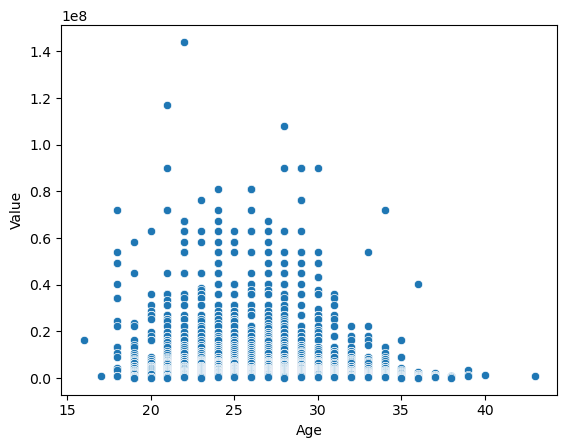

In [16]:
sns.scatterplot(x = df_clean['Age'], y = df_clean['Value'])

In [16]:
max(df_clean['Value'])

144000000

In [17]:
highest_value_player = df_clean.loc[df_clean["Value"] == max(df_clean['Value'])]

highest_value_player

,Player,Club,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),...,Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,1.00,31.0,27.0,27.0,7.0,...,812.0,61.0,12.0,1.0,0.0,7.0,23.0,68.0,7.0,144000000


In [18]:
# Sort df_clean by highest to lowest player value

df_clean.sort_values(by = 'Value', ascending = False)

,Player,Club,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),...,Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,1.00,31.0,27.0,27.0,7.0,...,812.0,61.0,12.0,1.0,0.0,7.0,23.0,68.0,7.0,144000000
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,3.00,28.0,27.0,27.0,6.0,...,360.0,32.0,20.0,9.0,0.0,15.0,21.0,13.0,37.0,117000000
2,Harry Kane,Tottenham Hotspur,28,attack,England,3.00,35.0,35.0,23.0,14.0,...,657.0,125.0,30.0,13.0,1.0,41.0,26.0,37.0,90.0,108000000
3,Jadon Sancho,Manchester United,21,attack,England,5.00,26.0,24.0,8.0,11.0,...,1160.0,148.0,38.0,1.0,0.0,8.0,1.0,52.0,5.0,90000000
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,2.00,37.0,34.0,22.0,5.0,...,1071.0,137.0,14.0,1.0,0.0,11.0,22.0,47.0,21.0,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Niklas Lomb,Bayer 04 Leverkusen,28,Goalkeeper,Germany,1.00,2.0,1.0,0.0,0.0,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225000
2062,Fabio Carvalho,Fulham FC,19,midfield,England,1.00,4.0,3.0,1.0,0.0,...,67.0,5.0,6.0,0.0,0.0,0.0,4.0,2.0,1.0,225000
2066,Ahmad Ngouyamsa,Dijon FCO,20,Defender,Cameroon,1.00,3.0,2.0,0.0,0.0,...,66.0,1.0,8.0,1.0,0.0,7.0,4.0,3.0,2.0,225000
2069,Federico Marchetti,Genoa CFC,38,Goalkeeper,Italy,1.00,4.0,4.0,0.0,0.0,...,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180000


<Axes: >

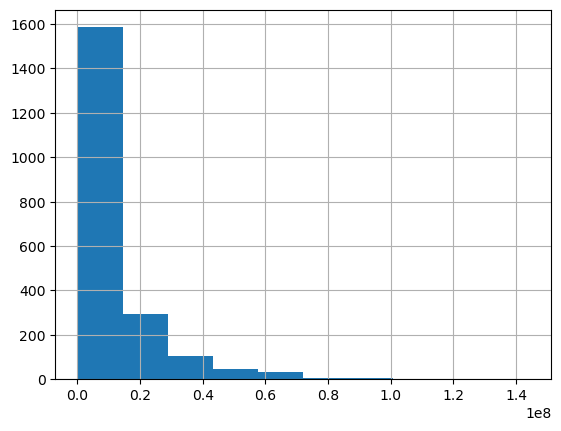

In [19]:
#checking if the target variable is skewed
df['Value'].hist()

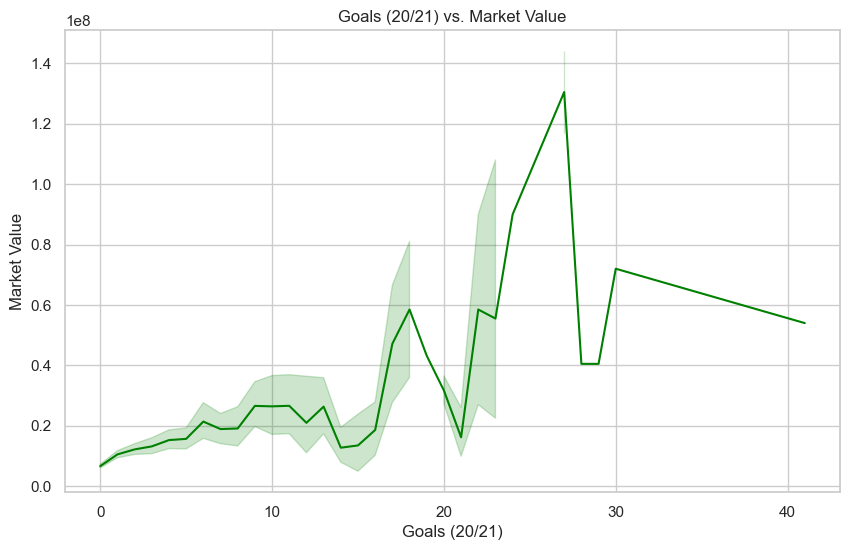

In [22]:
#plot to show the relationship between goal scored and market value

sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Gls (20/21)', y='Value', data=df, color='green')

# Set plot labels and title
plt.title('Goals (20/21) vs. Market Value')
plt.xlabel('Goals (20/21)')
plt.ylabel('Market Value')

# Show the plot
plt.show()

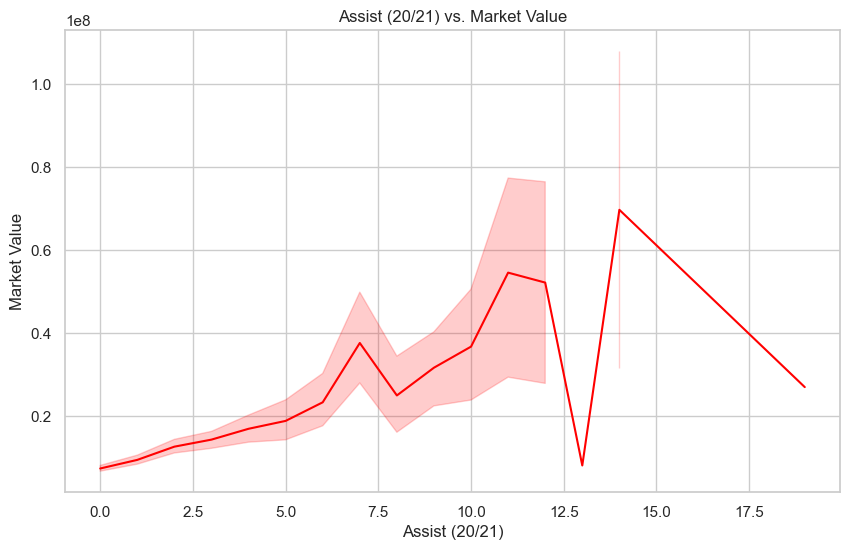

In [23]:
#plot showing the relationship between assists and market value

sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ast (20/21)', y='Value', data=df, color='red')

# Set plot labels and title
plt.title('Assist (20/21) vs. Market Value')
plt.xlabel('Assist (20/21)')
plt.ylabel('Market Value')

# Show the plot
plt.show()

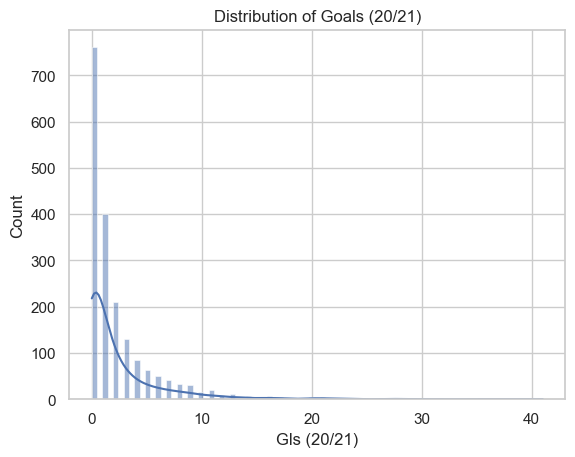

In [24]:
#Check the distribution of 'Gls (20/21)'
sns.histplot(df['Gls (20/21)'], kde=True)
plt.title('Distribution of Goals (20/21)')
plt.show()

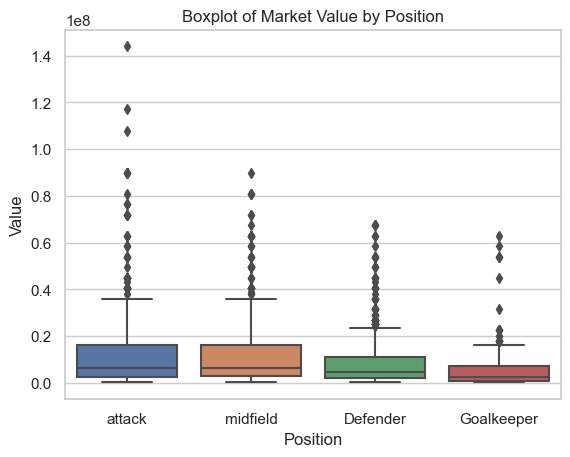

In [25]:
# creating boxplot of market value by 'Position'
sns.boxplot(x='Position', y='Value', data=df)
plt.title('Boxplot of Market Value by Position')
plt.show()

# Model building

In [26]:
# Splitting of numerical variables from categorical variables

df_clean.dtypes

# For some reason, "Contract Years Left" should be a float, but it is stored as an object,
# and, when trying to convert it to a float, it does not allow for conversion as it contains strings
# df_clean['Contract Years Left'] = df_clean['Contract Years Left'].apply(lambda x: float(x))

df_cat = df_clean.select_dtypes(include=['object']).drop('Contract Years Left', axis=1)

df_num = df_clean.select_dtypes(exclude=['object'])
df_num['Contract Years Left'] = df_clean['Contract Years Left']

In [33]:
# Correlation matrix for numerical variables

corr_matrix = df_num.corr()

/var/folders/mn/5541kpdx47q2cp7l_4fp_ftm0000gn/T/ipykernel_40804/1533065240.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_num.corr()


<Axes: >

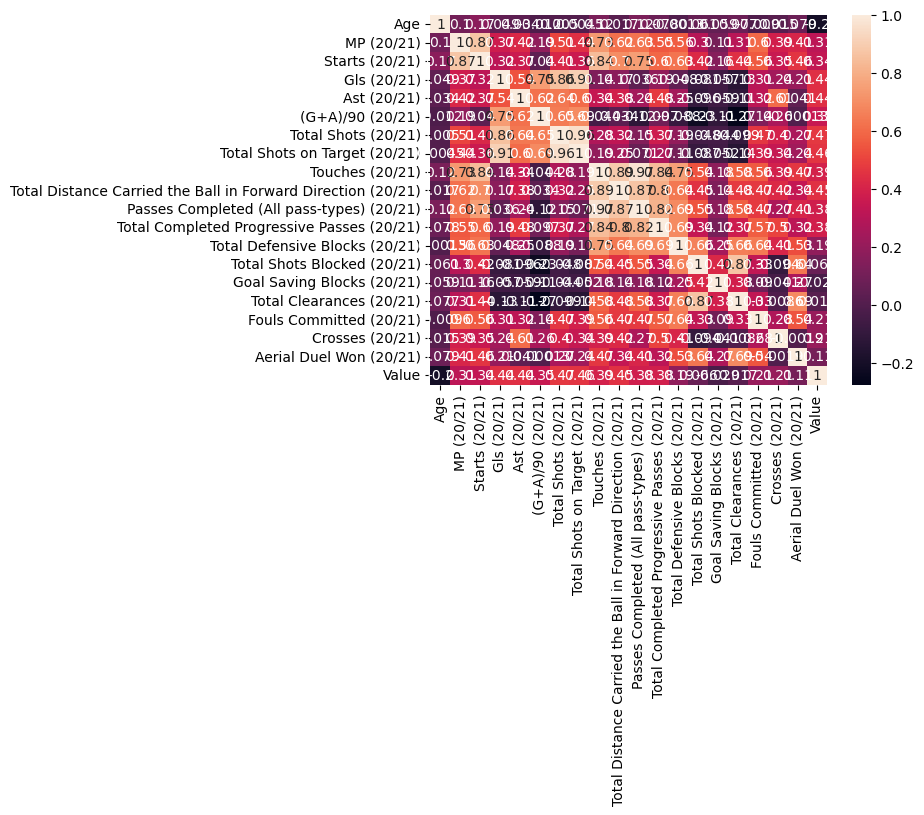

In [36]:
sns.heatmap(corr_matrix, annot=True)

In [37]:
corr_matrix

,Age,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Touches (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value
Age,1.000000,0.103275,0.171745,0.049420,0.034018,-0.012131,0.005014,0.004515,0.120260,0.017340,0.124778,0.077711,-0.001322,0.061072,0.059141,0.077290,-0.009023,0.015256,0.078920,-0.204351
MP (20/21),0.103275,1.000000,0.870824,0.371314,0.418958,0.188008,0.505104,0.444516,0.731857,0.618034,0.627070,0.552732,0.562957,0.303031,0.112737,0.306888,0.602011,0.387246,0.409999,0.314946
Starts (20/21),0.171745,0.870824,1.000000,0.315875,0.367909,0.040012,0.414183,0.358549,0.844377,0.699757,0.751050,0.596157,0.628117,0.424289,0.157157,0.444962,0.559570,0.354112,0.462259,0.336922
Gls (20/21),0.049420,0.371314,0.315875,1.000000,0.541664,0.746058,0.857514,0.905592,0.139308,0.169525,0.036090,0.190897,0.047647,-0.081002,-0.057152,-0.130884,0.307866,0.242103,0.210419,0.444798
Ast (20/21),0.034018,0.418958,0.367909,0.541664,1.000000,0.617483,0.637232,0.603093,0.344260,0.383459,0.244174,0.477265,0.248753,-0.096369,-0.058844,-0.113243,0.322427,0.607073,0.040684,0.443671
(G+A)/90 (20/21),-0.012131,0.188008,0.040012,0.746058,0.617483,1.000000,0.649393,0.691511,-0.044431,0.034105,-0.119643,0.096859,-0.088290,-0.227687,-0.108568,-0.273215,0.142663,0.261610,-0.000128,0.348715
Total Shots (20/21),0.005014,0.505104,0.414183,0.857514,0.637232,0.649393,1.000000,0.956054,0.276097,0.323718,0.146720,0.369114,0.192836,-0.048495,-0.043949,-0.099104,0.466824,0.395622,0.268722,0.472152
Total Shots on Target (20/21),0.004515,0.444516,0.358549,0.905592,0.603093,0.691511,0.956054,1.000000,0.193232,0.245360,0.070729,0.272262,0.108045,-0.087117,-0.051609,-0.141847,0.390327,0.344679,0.238268,0.462154
Touches (20/21),0.120260,0.731857,0.844377,0.139308,0.344260,-0.044431,0.276097,0.193232,1.000000,0.888109,0.974856,0.842989,0.753387,0.538492,0.183053,0.579033,0.560514,0.389227,0.466819,0.394451
Total Distance Carried the Ball in Forward Direction (20/21),0.017340,0.618034,0.699757,0.169525,0.383459,0.034105,0.323718,0.245360,0.888109,1.000000,0.870168,0.799640,0.640846,0.449507,0.138605,0.476755,0.470028,0.423588,0.340659,0.449771


In [46]:
# We create two correlation matrices with two different thresholds (0.7 and 0.9)

# Keep only values higher than the 0.7 or 0.9 correlation threshold

corr_matrix_thresholded_07 = corr_matrix[(corr_matrix>=0.7) & (corr_matrix<1)]
corr_matrix_thresholded_09 = corr_matrix[(corr_matrix>=0.9) & (corr_matrix<1)]

In [ ]:
# In terms of number of parameters (columns) to numbers of rows,
# a rule of thumb is to use a ratio 1:10 (columns:rows)

In [47]:
# A strong correlation is observed between the following variables:

# MP (20/21) - Starts (20/21): 0.870824
# MP (20/21) - Touches (20/21): 0.731857
# Starts (20/21) - Touches (20/21): 0.844377
# Starts (20/21) - Passes Completed (All pass-types) (20/21): 0.751050
# Gls (20/21) - (G+A)/90 (20/21): 0.746058
# Gls (20/21) - Total Shots (20/21): 0.857514
# Gls (20/21) - Total Shots on Target (20/21): 0.905592
# Total Shots (20/21) - Total Shots on Target (20/21): 0.956054
# Touches (20/21) - Total Distance Carried the Ball in Forward Direction (20/21): 0.888109
# Touches (20/21) - Passes Completed (All pass-types) (20/21): 0.974856
# Touches (20/21) - Total Completed Progressive Passes (20/21): 0.842989
# Touches (20/21) - Total Defensive Blocks (20/21): 0.753387
# Total Distance Carried the Ball in Forward Direction (20/21) - Passes Completed (All pass-types) (20/21): 0.870168
# Total Distance Carried the Ball in Forward Direction (20/21) - Total Completed Progressive Passes (20/21): 0.799640
# Passes Completed (All pass-types) (20/21) - Total Completed Progressive Passes (20/21): 0.815025
# Total Shots Blocked (20/21) - Total Clearances (20/21): 0.866892

corr_matrix_thresholded

,Age,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Touches (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MP (20/21),NaN,NaN,0.870824,NaN,NaN,NaN,NaN,NaN,0.731857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Starts (20/21),NaN,0.870824,NaN,NaN,NaN,NaN,NaN,NaN,0.844377,NaN,0.751050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gls (20/21),NaN,NaN,NaN,NaN,NaN,0.746058,0.857514,0.905592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ast (20/21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(G+A)/90 (20/21),NaN,NaN,NaN,0.746058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Shots (20/21),NaN,NaN,NaN,0.857514,NaN,NaN,NaN,0.956054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Shots on Target (20/21),NaN,NaN,NaN,0.905592,NaN,NaN,0.956054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Touches (20/21),NaN,0.731857,0.844377,NaN,NaN,NaN,NaN,NaN,NaN,0.888109,0.974856,0.842989,0.753387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Distance Carried the Ball in Forward Direction (20/21),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888109,NaN,0.870168,0.799640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Based on this data, it is necessary to remove the following variables

# df for 0.7 threshold:

# MP (20/21) - Starts (20/21): 0.870824
# MP (20/21) - Touches (20/21): 0.731857
# Starts (20/21) - Touches (20/21): 0.844377
# Starts (20/21) - Passes Completed (All pass-types) (20/21): 0.751050
# Gls (20/21) - (G+A)/90 (20/21): 0.746058
# Gls (20/21) - Total Shots (20/21): 0.857514
# Gls (20/21) - Total Shots on Target (20/21): 0.905592
# Total Shots (20/21) - Total Shots on Target (20/21): 0.956054
# Touches (20/21) - Total Distance Carried the Ball in Forward Direction (20/21): 0.888109
# Touches (20/21) - Passes Completed (All pass-types) (20/21): 0.974856
# Touches (20/21) - Total Completed Progressive Passes (20/21): 0.842989
# Touches (20/21) - Total Defensive Blocks (20/21): 0.753387
# Total Distance Carried the Ball in Forward Direction (20/21) - Passes Completed (All pass-types) (20/21): 0.870168
# Total Distance Carried the Ball in Forward Direction (20/21) - Total Completed Progressive Passes (20/21): 0.799640
# Passes Completed (All pass-types) (20/21) - Total Completed Progressive Passes (20/21): 0.815025
# Total Shots Blocked (20/21) - Total Clearances (20/21): 0.866892

In [23]:
# X-y splitting